In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

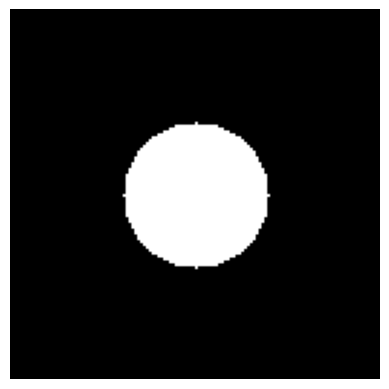

In [2]:
#Creating a black and white circle 
size=128
image=np.zeros((size,size),dtype=np.uint8)
center=(size/2,size/2)
radius=25
for y in range(size):
    for x in range(size):
        dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
        if dist<=radius:
            image[y,x]=255
plt.imshow(image,cmap="gray")
plt.axis('off')
plt.show()
image_path='input_images/circle.jpg'
plt.imsave(image_path,image,cmap='gray')


In [3]:
# Create the image matrix (same as before)
size = 128
image = np.zeros((size, size), dtype=np.uint8)
center = (size / 2, size / 2)
radius = 25
for y in range(size):
    for x in range(size):
        dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
        if dist <= radius:
            image[y, x] = 255
df = pd.DataFrame(image)
excel_path = 'CSV_files/circle_image_matrix_extracted.xlsx'
df.to_excel(excel_path, index=False, header=False)

In [4]:
def matrix(excel_path):
    df=pd.read_excel(excel_path,header=None)
    return df.to_numpy()

matrix('CSV_files/circle_image_matrix_extracted.xlsx')
def save_output_to_excel(output, output_path):
    df = pd.DataFrame(output)
    df.to_excel(output_path, index=False, header=False)

    #visulaize the circle after the first convolution 
def plot(matrix,title="Image",cmap='gray'):
    plt.imshow(matrix,cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

#Acitvation Functions
def relu(x):
    return np.maximum(0,x)
def sigmoid(x):
    return (1/(1+np.exp(-x)))
def tanh(x):
    return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))

In [5]:
def conv(input_image,Kernel,Stride=1,Padding=1):
    Pad=np.pad(input_image,((Padding,Padding),(Padding,Padding)),mode='constant',constant_values=0)
    output_h=(Pad.shape[0]-Kernel.shape[0])//Stride+1
    output_w=(Pad.shape[1]-Kernel.shape[1])//Stride+1
    output=np.zeros((output_h,output_w))
    for i in range(0,output_h*Stride,Stride):
        for j in range(0,output_w*Stride,Stride):
            region=Pad[i:i+Kernel.shape[0],j:j+Kernel.shape[1]]
            output[i//Stride,j//Stride]=np.sum(region*Kernel)
    return output
'''k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=2)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(op, output_path)'''

"k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])\ninput=matrix('CSV_files/circle_image_matrix_extracted.xlsx')\nop=conv(input,k,Stride=2)\noutput_path = 'output_convolution_result,stride2.xlsx'\nsave_output_to_excel(op, output_path)"

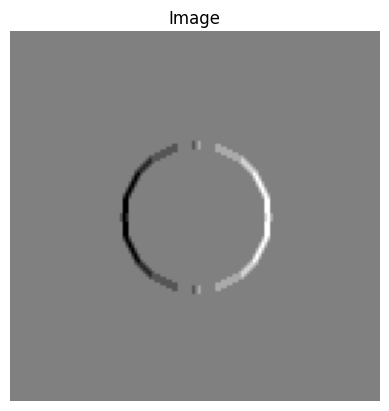

In [6]:
output=matrix("CSV_files/output_convolution_result.xlsx")
plot(output)

In [7]:
k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=2)
activated_op=relu(op)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(activated_op, output_path)

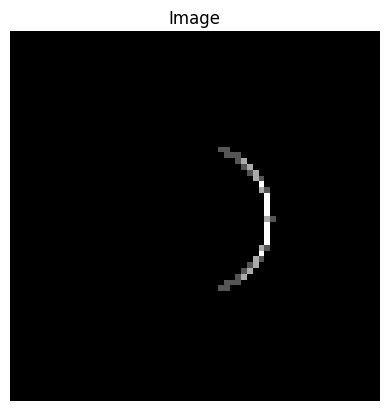

In [8]:
output=matrix("output_convolution_result,stride2.xlsx")
plot(output)

C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:21: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


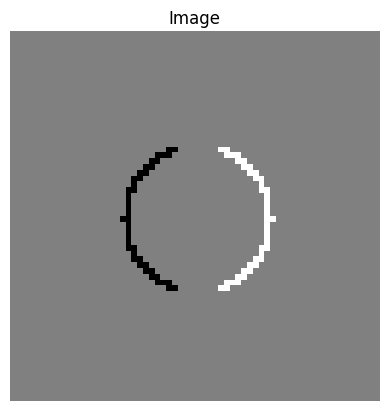

In [9]:
k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=2)
activated_op=sigmoid(op)
output_path = 'output_convolution_result_sigmoid.xlsx'
save_output_to_excel(activated_op, output_path)
output=matrix(output_path)
plot(output)

C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:23: RuntimeWarning: overflow encountered in exp
  return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))
C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:23: RuntimeWarning: invalid value encountered in divide
  return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))


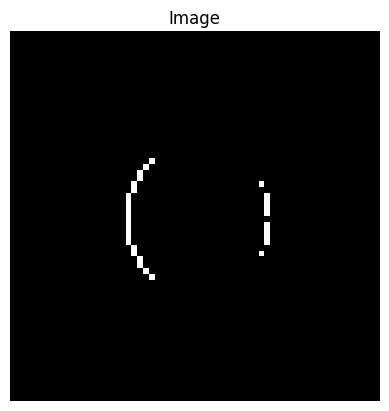

In [10]:
k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=2)
activated_op=tanh(op)
output_path = 'output_convolution_result_tanh.xlsx'
save_output_to_excel(activated_op, output_path)
output=matrix(output_path)
plot(output)

In [11]:
def max_pool(input_image,pool_size=2,stride=2):
    output_h = (input_image.shape[0] - pool_size) // stride + 1
    output_w = (input_image.shape[1] - pool_size) // stride + 1
    output = np.zeros((output_h, output_w))
    for i in range(0, output_h * stride, stride):
        for j in range(0, output_w * stride, stride):
            region = input_image[i:i + pool_size, j:j + pool_size]
            output[i // stride, j // stride] = np.max(region)
    return output
#Average pool 
def average_pooling(input_image, pool_size=2, stride=2):
    output_h = (input_image.shape[0] - pool_size) // stride + 1
    output_w = (input_image.shape[1] - pool_size) // stride + 1
    output = np.zeros((output_h, output_w))
    for i in range(0, output_h * stride, stride):
        for j in range(0, output_w * stride, stride):
            region = input_image[i:i + pool_size, j:j + pool_size]
            output[i // stride, j // stride] = np.mean(region)
    return output

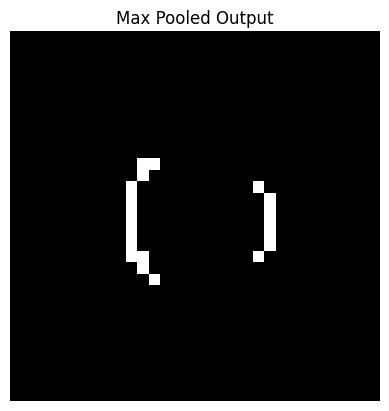

In [12]:
# Perform max pooling on the ReLU-activated output
pooled_output = max_pool(activated_op, pool_size=2, stride=2)

# Visualize the pooled output
plt.imshow(pooled_output, cmap='gray')
plt.title("Max Pooled Output")
plt.axis('off')
plt.show()


C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:23: RuntimeWarning: overflow encountered in exp
  return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))
C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:23: RuntimeWarning: invalid value encountered in divide
  return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))


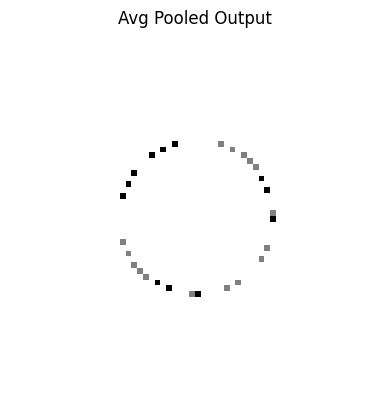

In [13]:
k=np.array([[1,1,1],[1,-1,1],[1,1,1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=1)
activated_op=tanh(op)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(activated_op, output_path)
# Perform max pooling on the ReLU-activated output
pooled_output = average_pooling(activated_op, pool_size=2, stride=2)

# Visualize the pooled output
plt.imshow(pooled_output, cmap='gray')
plt.title("Avg Pooled Output")
plt.axis('off')
plt.show()

C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:23: RuntimeWarning: overflow encountered in exp
  return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))
C:\Users\sharm\AppData\Local\Temp\ipykernel_9192\617685904.py:23: RuntimeWarning: invalid value encountered in divide
  return (np.exp(-x)-np.exp(x)/(np.exp(x)+np.exp(-x)))


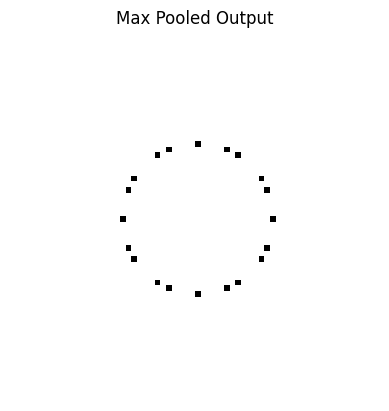

In [14]:
k=np.array([[1,1,1],[1,-1,1],[1,1,1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=1)
activated_op=tanh(op)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(activated_op, output_path)
# Perform max pooling on the ReLU-activated output
pooled_output = max_pool(activated_op, pool_size=1, stride=2)

# Visualize the pooled output
plt.imshow(pooled_output, cmap='gray')
plt.title("Max Pooled Output")
plt.axis('off')
plt.show()

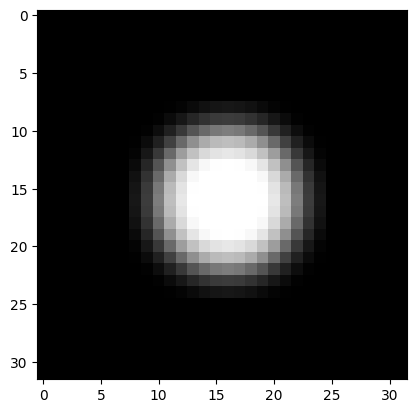

In [15]:
k=np.array([[1,1,1],[1,-1,1],[1,1,1]])
input=matrix('CSV_files/circle_image_matrix_extracted.xlsx')
op=conv(input,k,Stride=2)
op1=conv(op,k,Stride=2)
op2=conv(op1,k)
op3=conv(op2,k)
activated_op=relu(op3)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(activated_op, output_path)
# Perform max pooling on the ReLU-activated output

# Visualize the pooled output
plt.imshow(activated_op, cmap='gray')

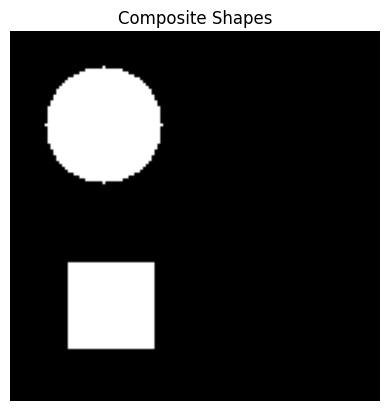

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
output_dir = 'input_images'
os.makedirs(output_dir, exist_ok=True)
def create_circle(canvas, center, radius):
    for y in range(canvas.shape[0]):
        for x in range(canvas.shape[1]):
            dist = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
            if dist <= radius:
                canvas[y, x] = 255
def create_square(canvas, top_left, side_length):
    start_y, start_x = top_left
    end_y = start_y + side_length
    end_x = start_x + side_length
    canvas[start_y:end_y, start_x:end_x] = 255
canvas_size = 128
canvas = np.zeros((canvas_size, canvas_size), dtype=np.uint8)
create_circle(canvas, center=(32, 32), radius=20)     
create_square(canvas, top_left=(80, 20), side_length=30) 
composite_image_path = os.path.join(output_dir, 'composite_shapes.jpg')
plt.imsave(composite_image_path, canvas, cmap='gray')
plt.figure()
plt.imshow(canvas, cmap='gray')
plt.title("Composite Shapes")
plt.axis('off')
plt.show()
# Save the canvas as an Excel file
excel_path = 'composite_shapes.xlsx'
df = pd.DataFrame(canvas)
df.to_excel(excel_path, index=False, header=False)

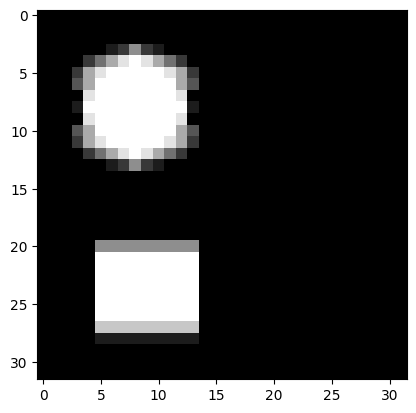

In [26]:
k=np.array([[-1,1,-1],[-1,1,-1],[-1,1,-1]])
input=matrix('composite_shapes.xlsx')
op=conv(input,k,Stride=2)
op1=conv(op,k,Stride=2)
op2=conv(op1,k)
op3=conv(op2,k)
activated_op=relu(op1)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(activated_op, output_path)
# Perform max pooling on the ReLU-activated output

# Visualize the pooled output
plt.imshow(activated_op, cmap='gray')

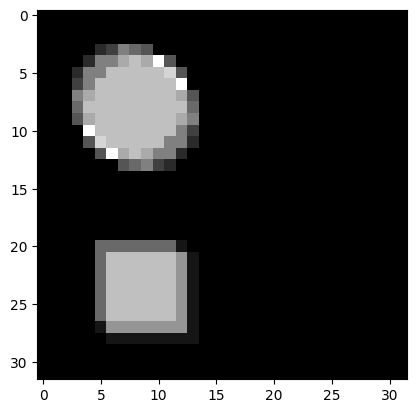

In [27]:
k=np.array([[-1,-1,1],[-1,1,-1],[1,-1,-1]])
input=matrix('composite_shapes.xlsx')
op=conv(input,k,Stride=2)
op1=conv(op,k,Stride=2)
op2=conv(op1,k)
op3=conv(op2,k)
activated_op=relu(op1)
output_path = 'output_convolution_result,stride2.xlsx'
save_output_to_excel(activated_op, output_path)
# Perform max pooling on the ReLU-activated output

# Visualize the pooled output
plt.imshow(activated_op, cmap='gray')